In [3]:
from pytrends.request import TrendReq
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Vizu settings
%matplotlib inline
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (10, 6)

# Local imports
from utils import load_countries, plot_history, histories_to_pandas
from search_engine import SearchEngine

# reproducibility
import random
random.seed(1337)

In [4]:
COUNTRY_DIR = "docs/countries.txt"
COUNTRY_IGNORE_DIR = "docs/ignore.txt"
LANGUAGE = 'en-US'
TIME_ZONE = 360

search_engine = SearchEngine(
    pytrends = TrendReq(hl=LANGUAGE, tz=TIME_ZONE),
    supported_countries = load_countries(filename=COUNTRY_DIR, ignore=COUNTRY_IGNORE_DIR),
    fetch_interval = 1
)

### Example query: 1

```python
YEAR = 2019
SEARCH_TERMS = ["ski"]
SEARCH_COUNTRIES = ["Norway", "Sweden", "Denmark"]
```

### Example query: 2

```python
YEAR = 2019
SEARCH_TERMS = ["ski"]
SEARCH_COUNTRIES = 3 
# 0: int .. returns all available countries
# 3: int .. returns 3 random countries 
# X: int .. returns X random countries 
```

### Example query: 3

```python
YEAR = 2019
SEARCH_TERMS = ["cheese", "wine"]
SEARCH_COUNTRIES = ["Italy", "France", "Spain"]
```

In [5]:
YEAR = 2018
SEARCH_TERMS = ["Donald Trump", "Climate Change", "Iran", "Khashoggi"]
SEARCH_COUNTRIES = ["Italy", "France", "Spain", "Germany"]

### Query the Google API via our Search Engine

In [6]:
history_trends = search_engine.get_daily_trends_by_year(
    search_terms=SEARCH_TERMS,
    year=YEAR,
    countries=SEARCH_COUNTRIES
)

Fetching trends: 100%|██████████| 4/4 [00:11<00:00,  2.78s/it]


#### Display trends

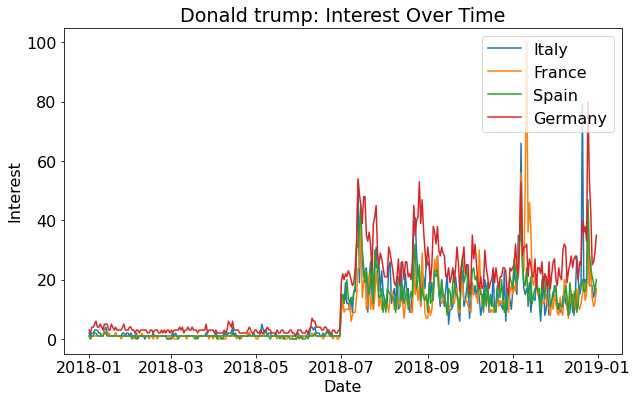

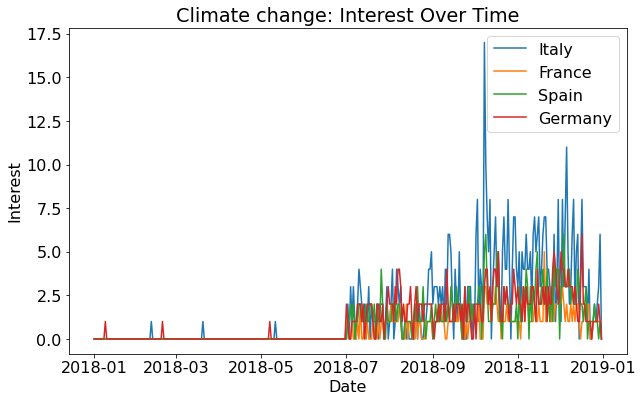

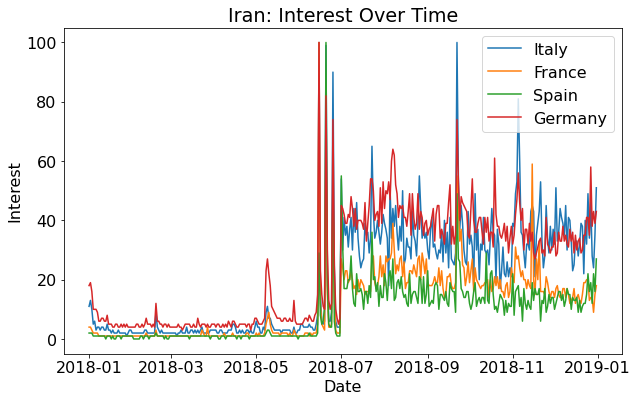

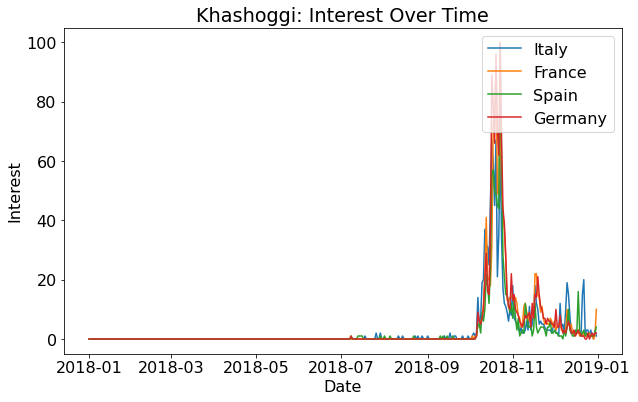

In [7]:
plot_history(history_trends, SEARCH_TERMS)

## Merge Trends to DataFrame

In [8]:
trends_df = histories_to_pandas(history_trends)

In [9]:
trends_df.head()

,date,Donald Trump,Climate Change,Iran,Khashoggi,country
0,2018-01-01,2,0,11,0,Italy
1,2018-01-02,1,0,13,0,Italy
2,2018-01-03,2,0,10,0,Italy
3,2018-01-04,2,0,5,0,Italy
4,2018-01-05,3,0,6,0,Italy


In [10]:
trends_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1460 non-null   datetime64[ns]
 1   Donald Trump    1460 non-null   int32         
 2   Climate Change  1460 non-null   int32         
 3   Iran            1460 non-null   int32         
 4   Khashoggi       1460 non-null   int32         
 5   country         1460 non-null   object        
dtypes: datetime64[ns](1), int32(4), object(1)
memory usage: 57.0+ KB


### TODO

- Check if all data is valid, and doesn't contain NaN values (?)
- Save DataFrame to DataBase (?)
  - what column_names to follow?
  - allow blank spaces?
  - etc etc..

### Optionally: save to CSV

In [11]:
trends_df.to_csv(f"trends-{YEAR}.csv", index=False)